## Using Keras to Build and Train Neural Networks

In this assignment you will use a neural network to predict diabetes using the Pima Diabetes Dataset.  You will use the Keras package to quickly build and train a neural network and compare the performance. 


## UCI Pima Diabetes Dataset

* UCI ML Repositiory (http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)

### Attributes: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

The UCI Pima Diabetes Dataset which has 8 numerical predictors and a binary outcome.

## Questions

### Part 1: Build a Baseline Model

Use the Sequential model to quickly build a baseline neural network with one single hidden layer with 12 nodes.\

1 Read and load data into Python \
2 Explore and pre-process the dataset \
3 Split the data to training and testing dataset (75%, 25%)\
4 Build the baseline model and find how many parameters does your model have?\
5 Train you model with 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128\
6 Graph the trajectory of the loss functions, accuracy on both train and test set.\
7 Evaluate and interpret the accuracy and loss performance during training, and testing. 

### Part 2: Find the Best Model

Now  try four different models and see if you can improve the accuracy by focusing on different network structures (i.e, activation functions, optimization algorithms, batch sizes, number of epochs, ...), affecting the performance, training time, and level of overfitting (or underfitting).

8. For all your models, plot the ROC curve for the predictions.
9. Which model has best performance, why?
10. Save your best model weights into a binary file.


Submit two files: the Jupyter notebook with your code and answers and its print out PDF.


## Part 1: Build a Baseline Model

In [2]:
%%capture
!pip install tqdm
!pip install torch torchvision torchaudio

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
tf.debugging.set_log_device_placement(True)

#### Import eda initial libraries ####

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, date, timedelta
import os
import math
import warnings 
from datetime import datetime, date, timedelta
import pyodbc
import time
import pickle
import boto3
from io import BytesIO
import re 
import matplotlib.pyplot as plt
import torch

plt.style.use('seaborn')

import seaborn as sns
from IPython.display import Image

from tqdm import tqdm

In [2]:
warnings.filterwarnings("ignore")

#### Read csv  diabates file ####

In [3]:
import os
os.getcwd()

'/home/ec2-user/SageMaker/DAAN 888/Lesson VI'

In [4]:
import time
start_time = time.time()

df =  pd.read_csv(r"/home/ec2-user/SageMaker/DAAN 888/Lesson VI/pima-indians-diabetes.csv", encoding="utf-8",
                  skip_blank_lines=True,
                  names=['Pregnancies',  'Glucose',  'BloodPressure',  'SkinThickness', 
                        'Insulin',  'BMI',  'DiabetesPedigreeFunction',  'Age','Outcome']) 

### clean columns names

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

df.reset_index(drop=True, inplace=True)

print("--- %s seconds ---" % (time.time() - start_time))    

--- 0.004852294921875 seconds ---


In [5]:

df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.dtypes

pregnancies                   int64
glucose                       int64
bloodpressure                 int64
skinthickness                 int64
insulin                       int64
bmi                         float64
diabetespedigreefunction    float64
age                           int64
outcome                       int64
dtype: object

In [8]:
df.shape

(768, 9)

In [9]:
import pandas as pd
from pandas import option_context

with option_context("display.max_rows", None,"display.max_colwidth",60,"display.max_columns",50):
        display(df.head(2))

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0



###### missing values #####

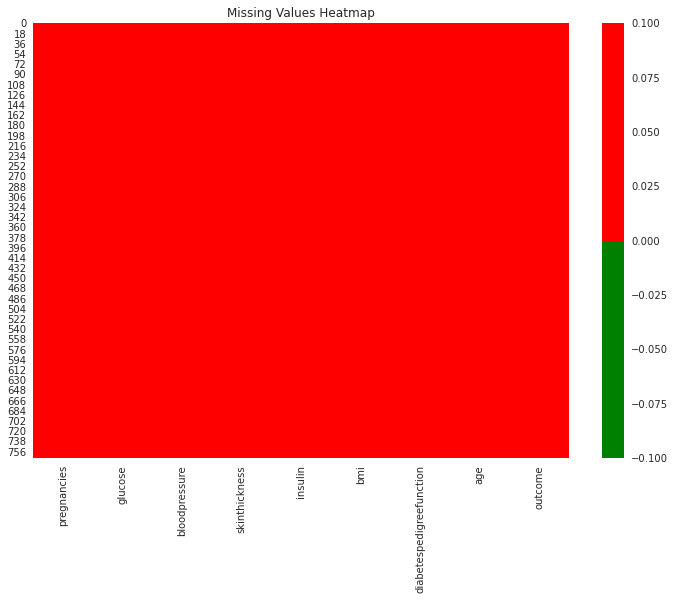

In [10]:
cols = df.columns 
colours = ['g', 'r'] 
f, ax = plt.subplots(figsize = (12,8))
sns.set_style("whitegrid")
plt.title('Missing Values Heatmap', )
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours));

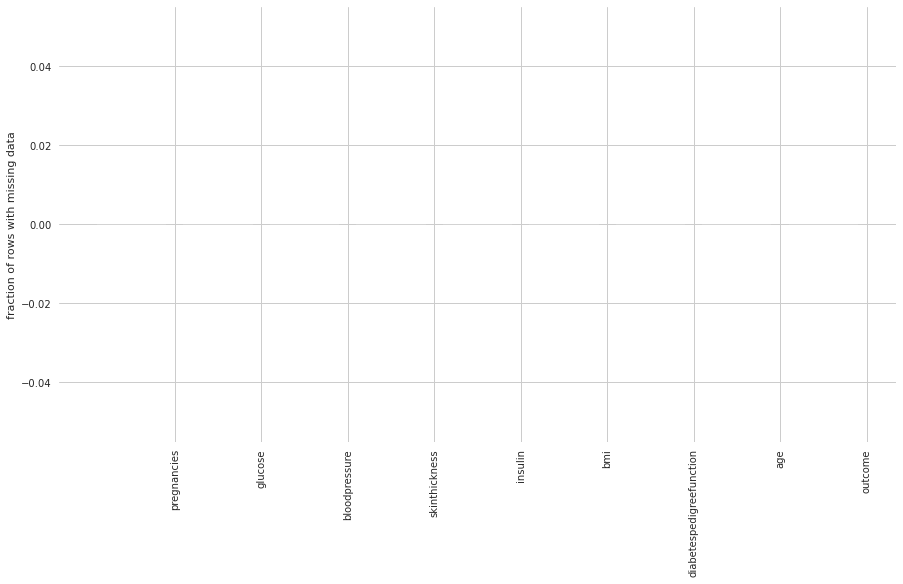

In [11]:
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(15,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)
plt.show()

In [12]:
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values 
missing_percentage = round(missing_count / value_count * 100,2) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

                          count  percentage
pregnancies                   0         0.0
glucose                       0         0.0
bloodpressure                 0         0.0
skinthickness                 0         0.0
insulin                       0         0.0
bmi                           0         0.0
diabetespedigreefunction      0         0.0
age                           0         0.0
outcome                       0         0.0


##### We have 0 missing values in our data but let's verify this out with the describe function, bc sometimes null values are presence as 0

##### General summary statistics 

In [13]:
import pandas as pd
from pandas import option_context

with option_context("display.max_rows", None,"display.max_colwidth",60,"display.max_columns",50):
        display(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bloodpressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skinthickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diabetespedigreefunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [14]:
##### The summary table above show us that the foollowing columns or variables have an invalid zero value:
##### (pregnancies is ok with 0 is nominal and logical)

###### 'glucose'
###### 'bloodpressure'
###### 'skinthickness'
###### 'insulin',
###### 'bmi'

#### It is almost imposible than somebody has 0 bmi

In [15]:
###### Let's replace those 0 values with na and looks at their ind distribution for data imputation. We can't drop data bc we only
##### have 768 total observations

In [16]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [17]:
import time
start_time = time.time()

df[['glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi']] = df[['glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi']].replace(0,np.NaN)

print("--- %s seconds ---" % (time.time() - start_time))    

--- 0.004117012023925781 seconds ---


In [18]:
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values 
missing_percentage = round(missing_count / value_count * 100,2) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

                          count  percentage
pregnancies                   0        0.00
glucose                       5        0.65
bloodpressure                35        4.56
skinthickness               227       29.56
insulin                     374       48.70
bmi                          11        1.43
diabetespedigreefunction      0        0.00
age                           0        0.00
outcome                       0        0.00


In [19]:
#### Now we can see the true missing values in each of our columns
#### 48 % of insulin records are missing

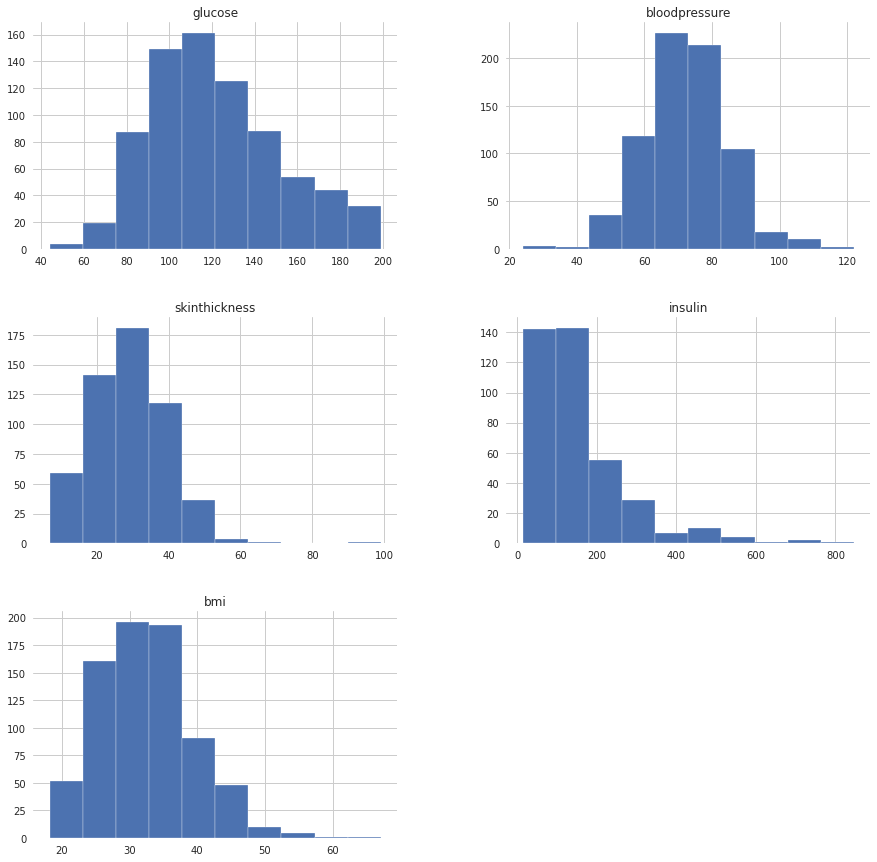

In [20]:
df[['glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi']].hist(figsize = (15,15))
plt.show()

In [21]:
##### let's impute our missing values based on the histograms above ######

In [22]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [23]:
import time
start_time = time.time()


df['glucose'].fillna(df['glucose'].mean(), inplace = True)
df['bloodpressure'].fillna(df['bloodpressure'].mean(), inplace = True)
df['skinthickness'].fillna(df['skinthickness'].median(), inplace = True)
df['insulin'].fillna(df['insulin'].median(), inplace = True)
df['bmi'].fillna(df['bmi'].median(), inplace = True)



print("--- %s seconds ---" % (time.time() - start_time))   

--- 0.002241849899291992 seconds ---


In [24]:
##### Plotting after 0 / na values removal######

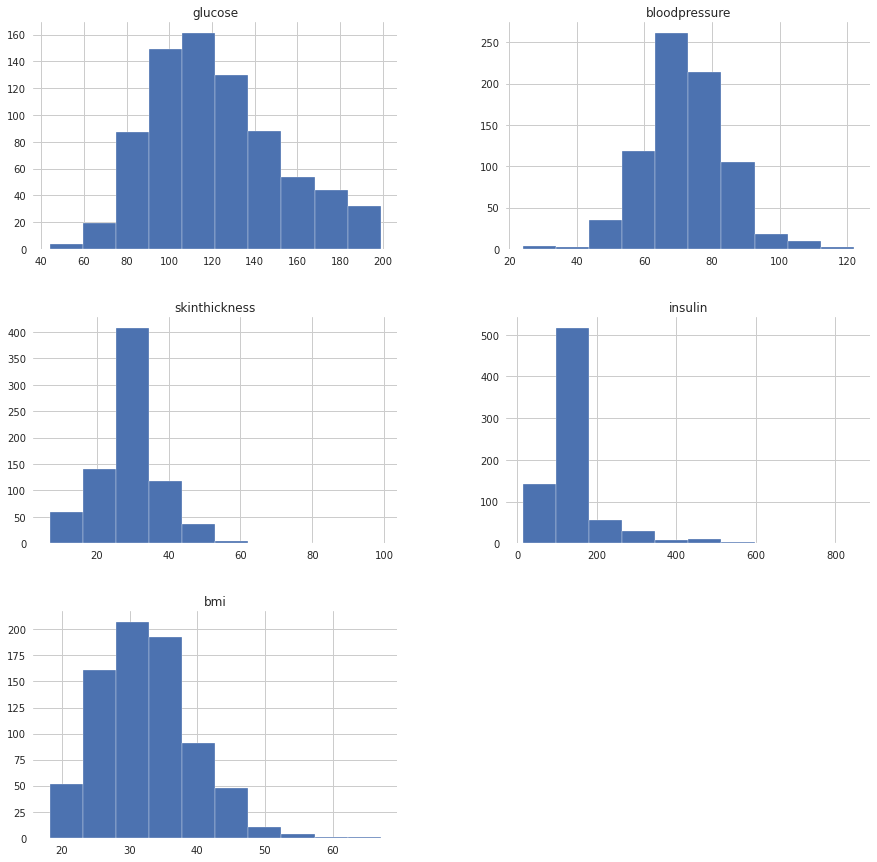

In [25]:
df[['glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi']].hist(figsize = (15,15))
plt.show()

In [26]:
df.dtypes

pregnancies                   int64
glucose                     float64
bloodpressure               float64
skinthickness               float64
insulin                     float64
bmi                         float64
diabetespedigreefunction    float64
age                           int64
outcome                       int64
dtype: object

##### Plot class distribution ######

In [27]:
df.outcome.value_counts()

0    500
1    268
Name: outcome, dtype: int64

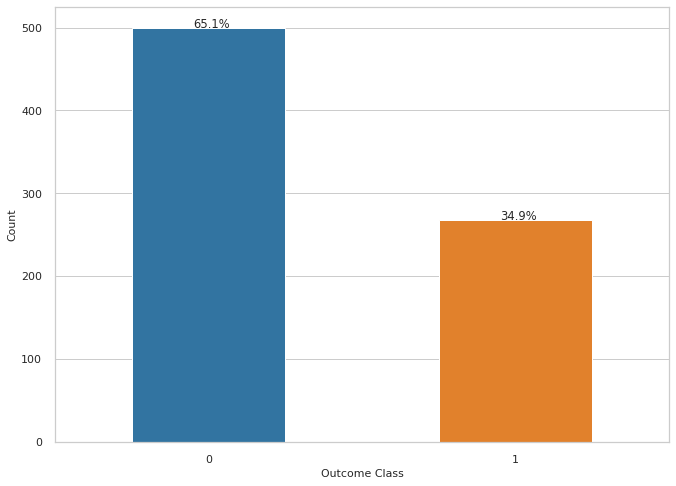

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(11,8))

color_labels = df.outcome.unique()

# List of color palette to use
rgb_values = sns.color_palette("tab10", 2)

# Map label to color palette

color_map = dict(zip(color_labels, rgb_values))


ax = sns.countplot(x="outcome", data=df,palette=df['outcome'].map(color_map))

plt.xticks(size=11)
plt.xlabel('Outcome Class', size=  11)
plt.yticks(size=11)
plt.ylabel('Count', size=  11)

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 11.5)
    plt.show()
    
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .50)

without_hue(ax, df.outcome)
plt.show()

In [29]:
###### There is some imbalance nature in our data ######

##### Outliers ######

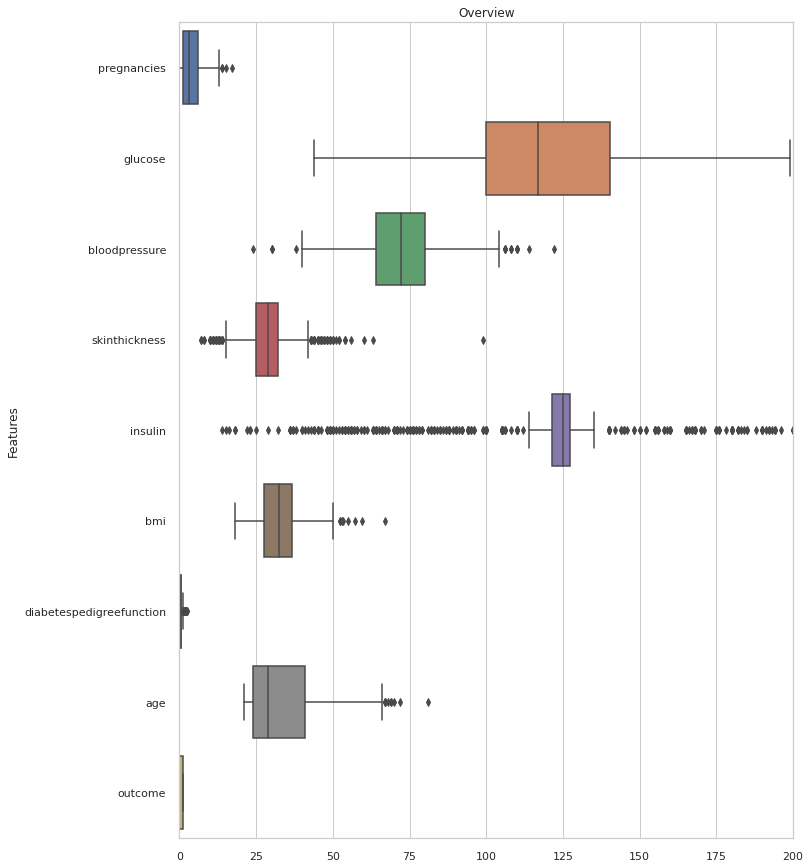

In [30]:
sns.set(style="whitegrid") 

f, ax = plt.subplots(figsize=(11, 15))

#ax.set_facecolor('#B1DEFD')
ax.set(xlim=(-.05, 200))
plt.ylabel('Features')
plt.title("Overview")
ax = sns.boxplot(data = df, 
  orient = 'h')
plt.show()

In [31]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

def OutLiersBox(df,nameOfFeature):
    
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

    trace2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

    trace3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(template="plotly_white",
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig, filename = "Outliers")

In [32]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [33]:
##### Individual features with large outliers#### 

In [34]:

OutLiersBox(df,'insulin')

In [35]:

OutLiersBox(df,'skinthickness')

In [36]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [37]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

pregnancies                   4
glucose                       0
bloodpressure                14
skinthickness                87
insulin                     346
bmi                           8
diabetespedigreefunction     29
age                           9
outcome                       0
dtype: int64

In [38]:
df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)].shape

(375, 9)

In [39]:
df.shape

(768, 9)

In [40]:
##### based on the visualization and table above, we can clearly see outliers are present in the data.

##### The insulin variale has the larger number of outliers in our dataset

##### NN may risk overfitting by learning from noise (outliers).

In [41]:
##### if we remove the total outliers using this method we will loose more than 50 % of our data
##### I will not remove any outliers of the dataset
####NN may risk overfitting by learning from noise (outliers) but deeper NN will perform well.

In [42]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

###### Multicolinearity between our independent variables ######

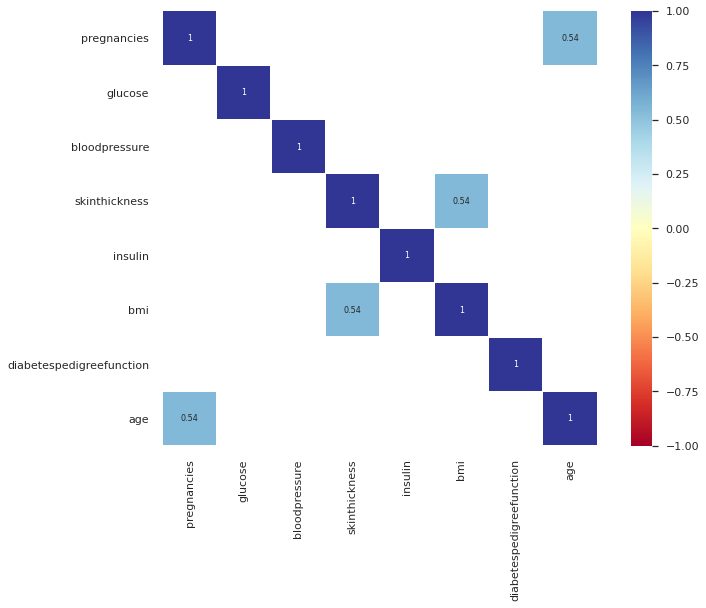

In [43]:
corr = df.drop(['outcome'], axis=1).corr() # correlations
plt.figure(figsize=((12,8)))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='RdYlBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [44]:
##### It does not look like there is a significant correlation between our predictors #####
#### Pregnancies and age & skinthickness with bmi have a corr coefficient larger than 0.5

In [45]:
##### Let's plot the indiv correlation of these variables against all the other ind variables.

In [46]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

Joint plot of Glucose with Other Variables ==> 

Correlation between pregnancies and glucose ==>  0.12791147208431844


<Figure size 500x400 with 0 Axes>

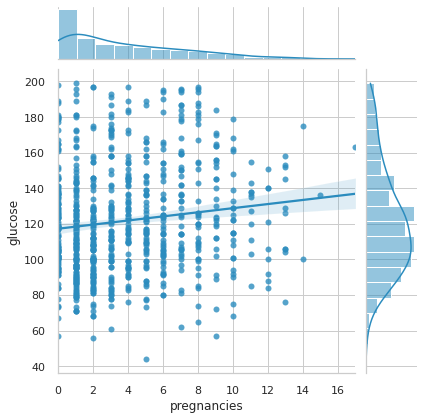

Correlation between pregnancies and bloodpressure ==>  0.20852230877900207


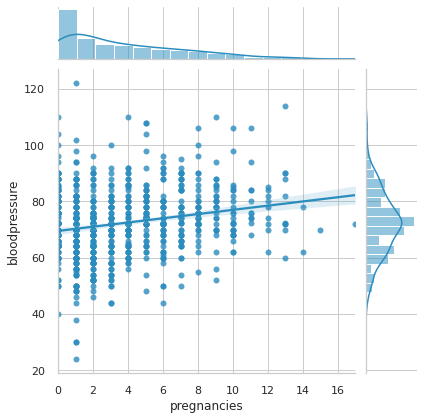

Correlation between pregnancies and skinthickness ==>  0.08176982300694918


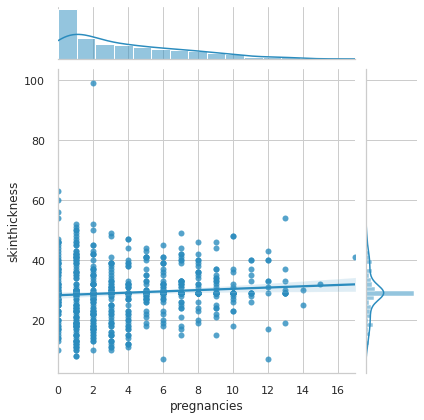

Correlation between pregnancies and insulin ==>  0.025047480864533175


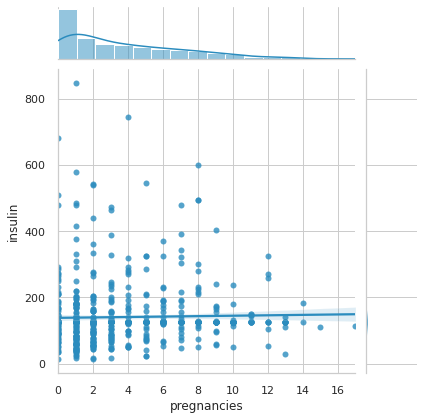

Correlation between pregnancies and bmi ==>  0.0215587287096652


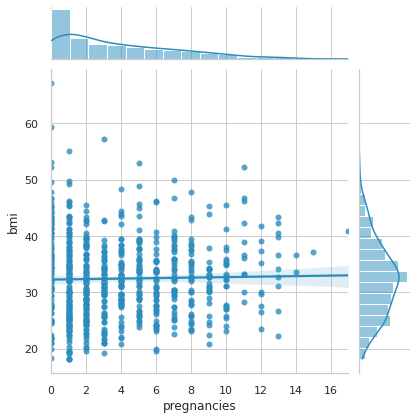

Correlation between pregnancies and diabetespedigreefunction ==>  -0.03352267296261304


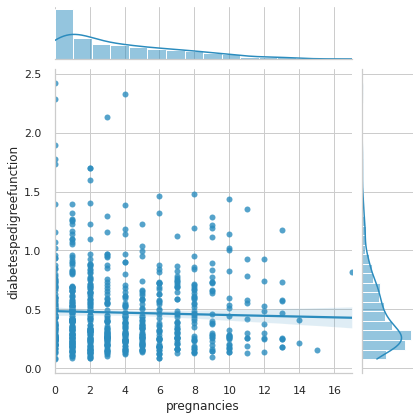

Correlation between pregnancies and age ==>  0.5443412284023392


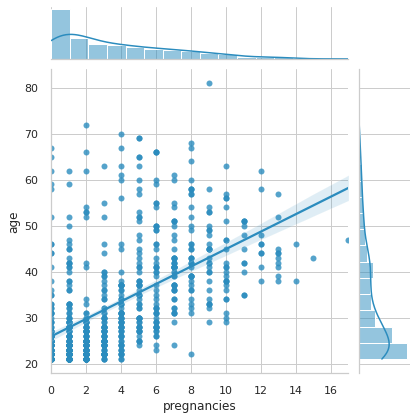

In [47]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of Glucose with Other Variables ==> \n")
for i in  df.columns:
    if i != 'pregnancies' and i != 'outcome':
        print(f"Correlation between pregnancies and {i} ==> ",df.corr().loc['pregnancies'][i])
        sns.jointplot(x='pregnancies',y=i,data=df,kind = 'reg',color = "#2b8cbe")
        plt.show()

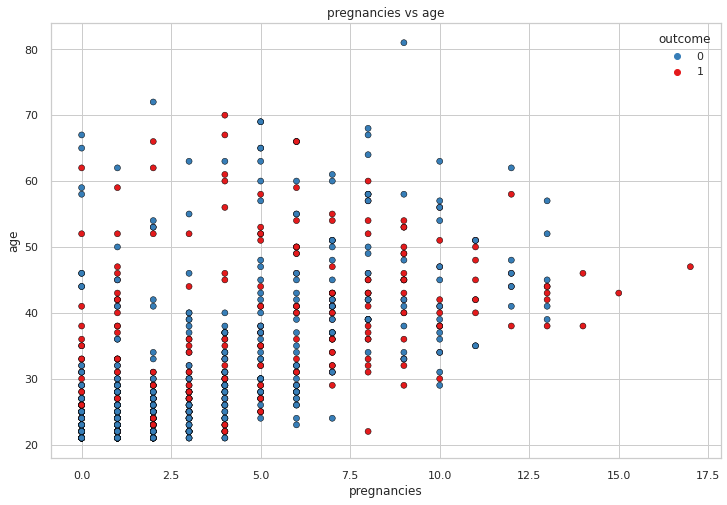

In [48]:
palette ={0 : '#377eb8', 1 : '#e41a1c'}

edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['pregnancies'], y = df['age'], hue = "outcome",
                    data = df, palette = palette, edgecolor=edgecolor)

# # plt.annotate('N6', size=25, color='black', xy=(20, 20), xytext=(50, 25),
# #             arrowprops=dict(facecolor='black', shrink=0.05),
#             )
# plt.plot([0, 20], [30, 30], linewidth=2, color = 'red')
# plt.plot([0, 0], [16, 30], linewidth=2, color = 'red')
# plt.plot([0, 20], [16, 16], linewidth=2, color = 'red')
# plt.plot([20, 20], [16, 30], linewidth=2, color = 'red')
plt.title('pregnancies vs age')
plt.show()

Joint plot of Glucose with Other Variables ==> 

Correlation between skinthickness and pregnancies ==>  0.08176982300694918


<Figure size 500x400 with 0 Axes>

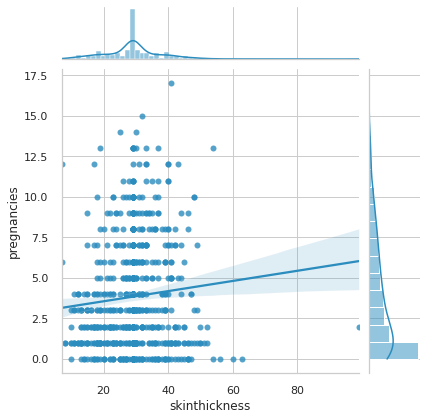

Correlation between skinthickness and glucose ==>  0.19268585591450346


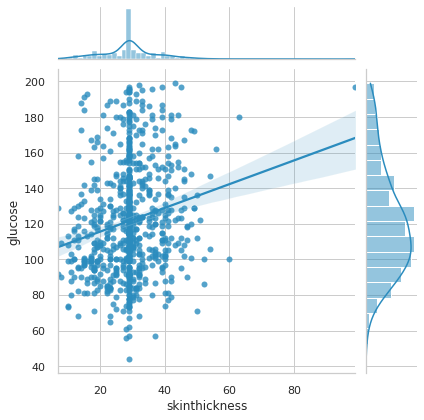

Correlation between skinthickness and bloodpressure ==>  0.1918534479739443


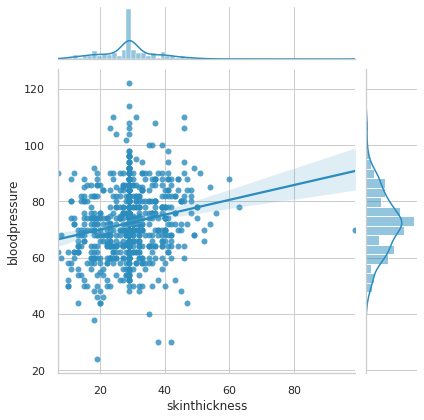

Correlation between skinthickness and insulin ==>  0.15561028255915096


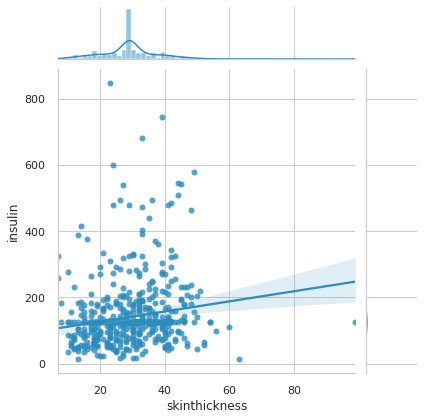

Correlation between skinthickness and bmi ==>  0.5432050699718665


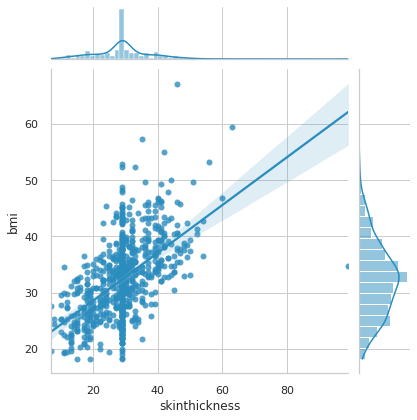

Correlation between skinthickness and diabetespedigreefunction ==>  0.10218826726571294


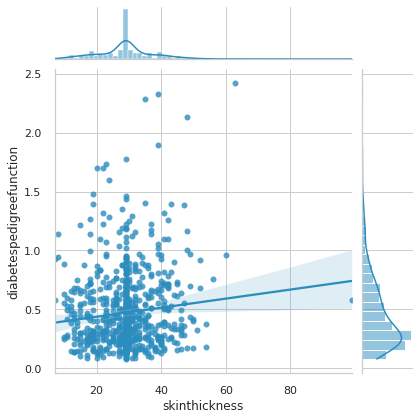

Correlation between skinthickness and age ==>  0.12610718967353202


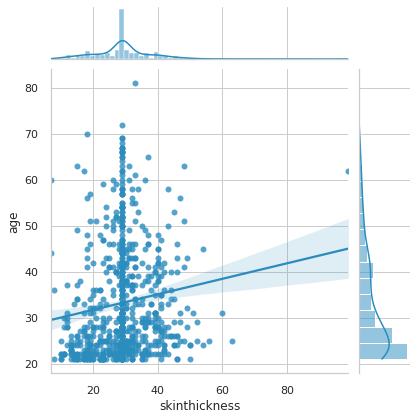

In [49]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of Glucose with Other Variables ==> \n")
for i in  df.columns:
    if i !=  'skinthickness' and i != 'outcome':
        print(f"Correlation between skinthickness and {i} ==> ",df.corr().loc['skinthickness'][i])
        sns.jointplot(x='skinthickness',y=i,data=df,kind = 'reg',color = "#2b8cbe")
        plt.show()

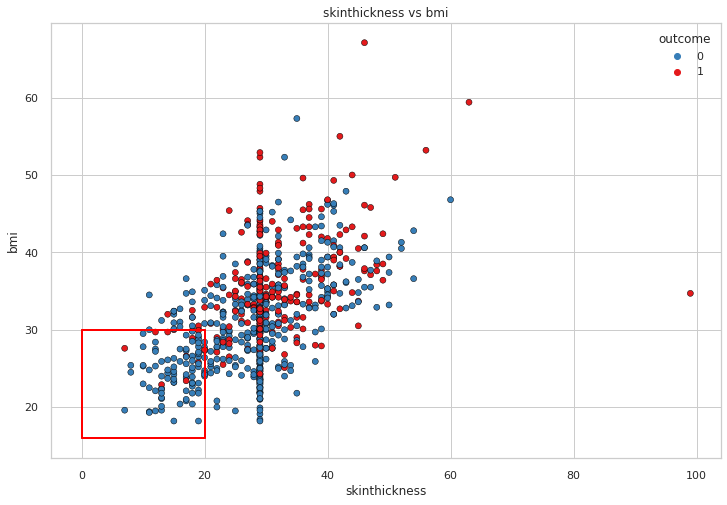

In [50]:
palette ={0 : '#377eb8', 1 : '#e41a1c'}

edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['skinthickness'], y = df['bmi'], hue = "outcome",
                    data = df, palette = palette, edgecolor=edgecolor)

# # plt.annotate('N6', size=25, color='black', xy=(20, 20), xytext=(50, 25),
# #             arrowprops=dict(facecolor='black', shrink=0.05),
#             )
plt.plot([0, 20], [30, 30], linewidth=2, color = 'red')
plt.plot([0, 0], [16, 30], linewidth=2, color = 'red')
plt.plot([0, 20], [16, 16], linewidth=2, color = 'red')
plt.plot([20, 20], [16, 30], linewidth=2, color = 'red')
plt.title('skinthickness vs bmi')
plt.show()

In [51]:
##### we observe that there is less chance of of positive outcome among people with 
#### low bmi and low skinthickness

###### Multivariable exploration #####

In [52]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

<Figure size 960x660 with 0 Axes>

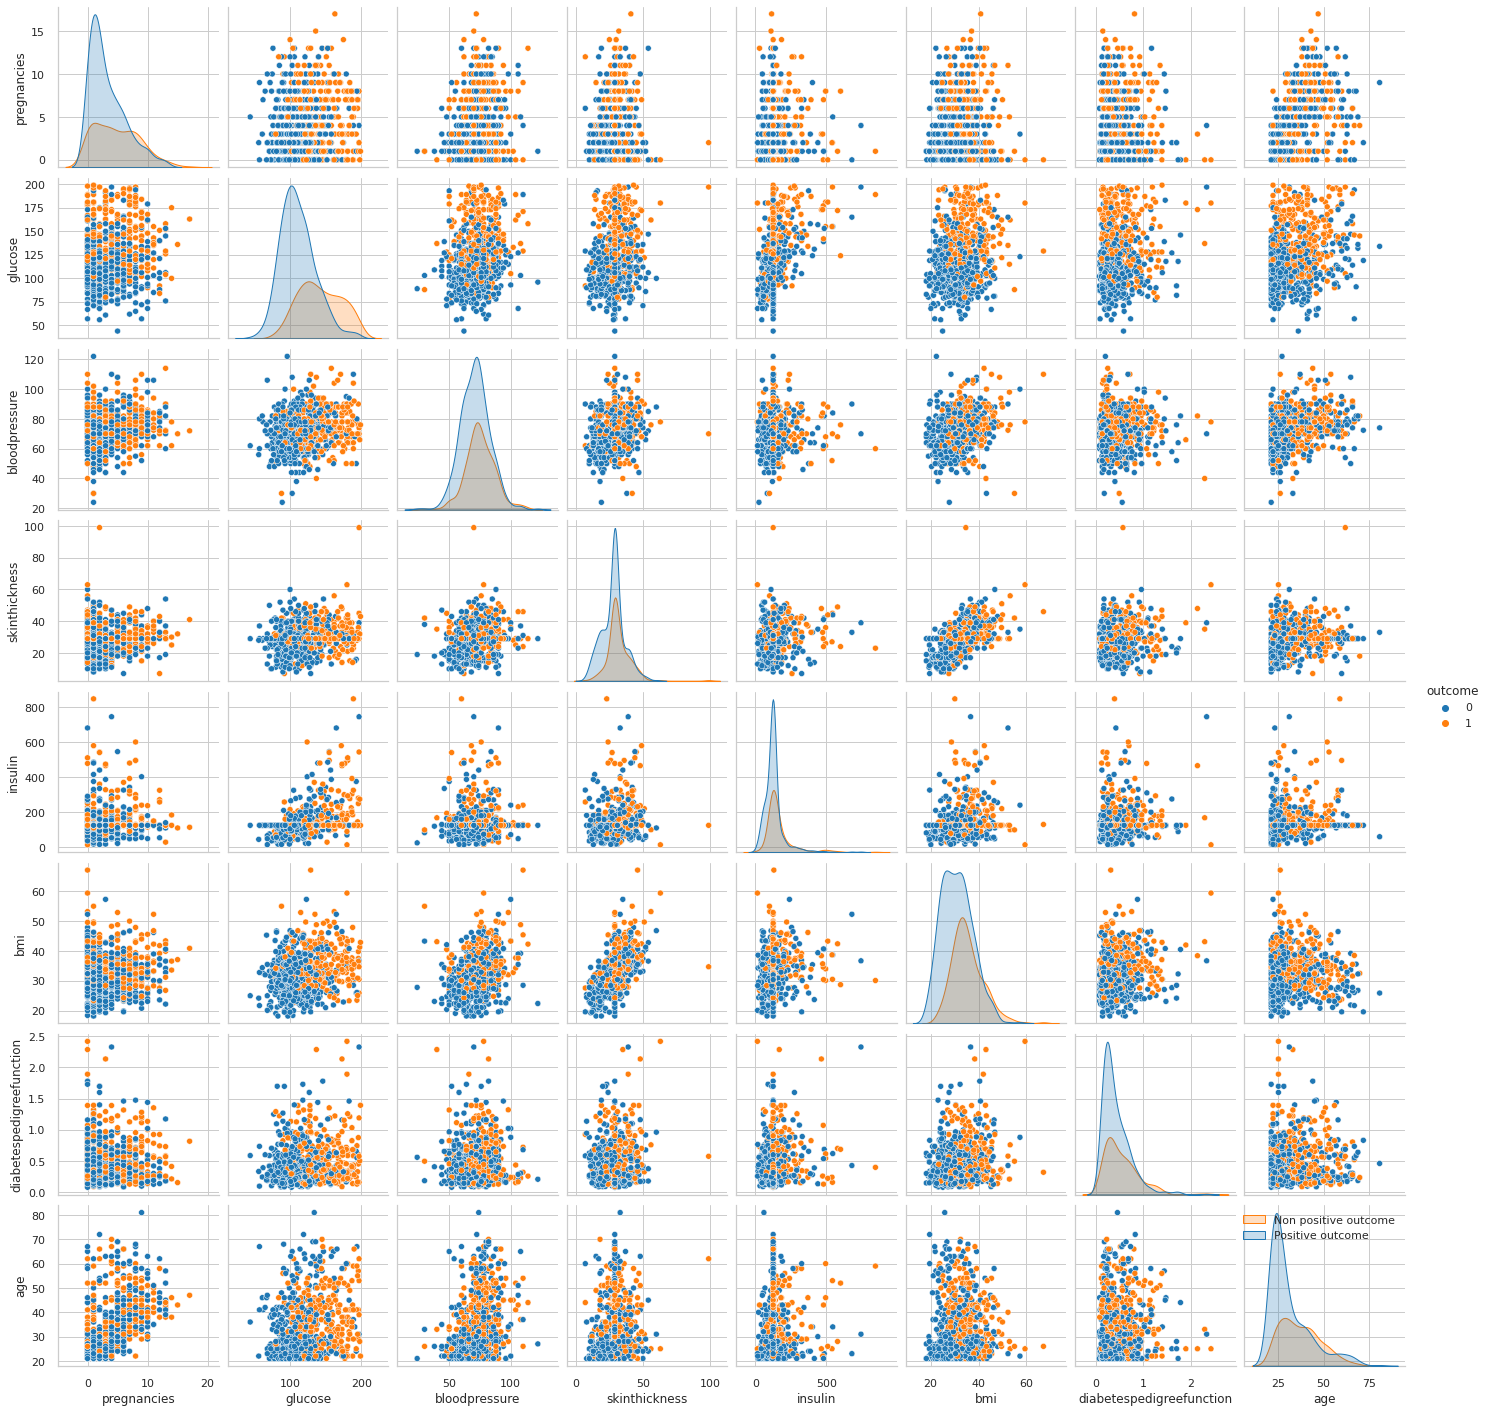

In [53]:
sns.set(style="whitegrid") 

plt.figure(dpi = 120)

sns.pairplot(df,hue = 'outcome',palette = 'tab10')

plt.legend(['Non positive outcome','Positive outcome'])

plt.show()

In [54]:
##### from the plot above it looks like younger people have a less possitive outcome

In [55]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [56]:
df['age'].groupby(df['outcome']).mean()

outcome
0    31.190000
1    37.067164
Name: age, dtype: float64

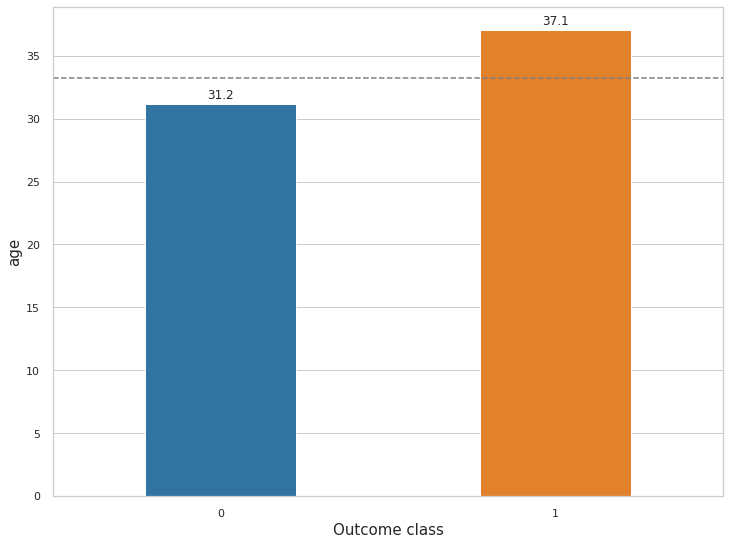

In [57]:
color_labels = df['outcome'].unique()

# List of color palette to use
rgb_values = sns.color_palette("tab10", 2)

# Map label to color palette

color_map = dict(zip(color_labels, rgb_values))

# plt.figure(figsize=(12,9))


col_series = df['age'].groupby(df['outcome']).mean()

plt.figure(figsize=(12,9))

splot = sns.barplot(x=[index for index,value in col_series.items()],
            y=[value for index,value in col_series.items()],
            data=df, 
            palette=df['outcome'].map(color_map))
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(splot, .45)

#plt.title('Average ltv (by default class)', fontsize = 18, pad = 12)
plt.xlabel("Outcome class", fontsize = 15)
plt.axhline(y=df['age'].mean(), color='gray', 
            linestyle='dashed', label="age Average")
plt.ylabel("age",fontsize = 15);


In [58]:
import plotly.express as px
import plotly.graph_objects as go

##### Age andd Outcome
fig2 = px.box(df, x = df['age'], color = 'outcome',  color_discrete_sequence=["red", "blue"],
              template="plotly_white")
fig2.show()

In [59]:
##### split in train and test and then trasnform 

In [60]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

##### Data transformation #####

In [61]:
#### We need to perform Feature scaling in order to normalize the range of independent variables befor
#### we feed into our neural nextwork 
#### NN uses gradient descent, then the difference in ranges of features will cause different step sizes for each feature. 

In [62]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [63]:
import time
start_time = time.time()

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["outcome"],axis = 1),),
        columns=['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age'])


print("--- %s seconds ---" % (time.time() - start_time))    

--- 0.18031716346740723 seconds ---


In [64]:
from pandas import option_context

with option_context('display.max_rows', None,'display.max_colwidth',50,'display.max_columns',50):
        display(X.head(5))

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [65]:
y = df['outcome']

##### train test split #####

In [66]:

#### there is some balance in our outcome target

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101, stratify=y)

In [68]:
print(X_train.shape)

print('------------')


print(X_test.shape)

print('------------')

print(y_train.shape)

print('------------')

print(y_test.shape)

(576, 8)
------------
(192, 8)
------------
(576,)
------------
(192,)


In [69]:
from pandas import option_context

with option_context('display.max_rows', None,'display.max_colwidth',50,'display.max_columns',50):
        display(X_train.head(2))

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
590,2.124780,-0.351352,0.959163,1.239762,-0.181541,2.087821,1.368487,1.000557
695,0.936914,0.667844,1.455504,-0.581421,3.930739,-0.299127,-1.038547,0.830381


In [70]:
from pandas import option_context

with option_context('display.max_rows', None,'display.max_colwidth',50,'display.max_columns',50):
        display(y_train.head(3))

590    1
695    1
741    0
Name: outcome, dtype: int64

In [71]:
#### Baseline model ######

In [72]:
import tensorflow as tf

In [73]:
from tensorflow import keras
from tensorflow.keras import layers

print(keras.__version__)

2.4.0


In [74]:
from tensorflow import keras
from tensorflow.keras import backend as k
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation
from tensorflow.keras.models import *
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPool1D, Dropout, Conv1D,LSTM, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils import plot_model

In [75]:
X_train.shape[1]

8

In [78]:
##### 8 input dimensions ###
#### simple model ###

In [77]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")
# define model architecture
k.clear_session()
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() #summary) of model

tf.keras code in this scope will run on GPU
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Extension horovod.torch has not been built: /home/ec2-user/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/horovod/torch/mpi_lib/_mpi_lib.cpython-37m-x86_64-linux-gnu.so not found
If this is not expected, reinstall Horovod with HOROVOD_WITH_PYTORCH=1 to debug the build error.
Warning! MPI libs are missing, but python applications are still avaiable.
[2021-09-27 17:48:31.057 ip-172-16-94-100.ec2.internal:16402 INFO utils.py:27] RULE_JOB_STO

#### Total params: 121

In [78]:
METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc')
]

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/repli

In [79]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")

# compile model
model.compile(tf.keras.optimizers.RMSprop(
    learning_rate=.001),loss='binary_crossentropy', metrics=METRICS)

tf.keras code in this scope will run on GPU
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [80]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")
callbacks = [ModelCheckpoint(filepath='model-baseline-DAAN-570.h5', save_best_only=True,verbose=1,
                             monitor='val_loss',
    mode='min')
            ]

tf.keras code in this scope will run on GPU


In [81]:
with tf.device("gpu:1"):
   print("tf.keras code in this scope will run on GPU")

#### train model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=callbacks)

tf.keras code in this scope will run on GPU
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/re

In [93]:
##### plot losses

In [82]:
df.shape

(768, 9)

In [83]:
pd.DataFrame(model.history.history)

,loss,accuracy,precision,recall,auc,val_loss,val_accuracy,val_precision,val_recall,val_auc
0,0.721350,0.436293,0.335196,0.689655,0.534124,0.681686,0.551724,0.512821,0.740741,0.612306
1,0.702912,0.467181,0.346386,0.660920,0.569016,0.671258,0.568965,0.525000,0.777778,0.648148
2,0.691629,0.513514,0.374194,0.666667,0.600107,0.663181,0.568965,0.525000,0.777778,0.667861
3,0.682619,0.540541,0.391156,0.660920,0.624231,0.656418,0.603448,0.552632,0.777778,0.689367
4,0.674454,0.563707,0.408451,0.666667,0.645566,0.650063,0.637931,0.583333,0.777778,0.709677
5,0.665628,0.594595,0.432331,0.660920,0.659566,0.643412,0.655172,0.600000,0.777778,0.721027
6,0.656872,0.623552,0.458167,0.660920,0.676682,0.637211,0.689655,0.645161,0.740741,0.741935
7,0.647772,0.652510,0.486957,0.643678,0.691543,0.630680,0.724138,0.689655,0.740741,0.763441
8,0.639967,0.667954,0.504505,0.643678,0.703956,0.624474,0.741379,0.700000,0.777778,0.777180
9,0.632347,0.683398,0.523585,0.637931,0.718942,0.617948,0.724138,0.703704,0.703704,0.789128


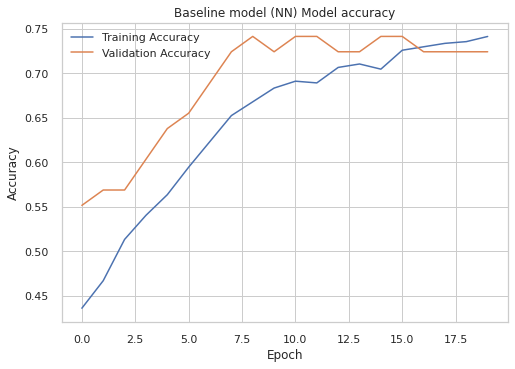

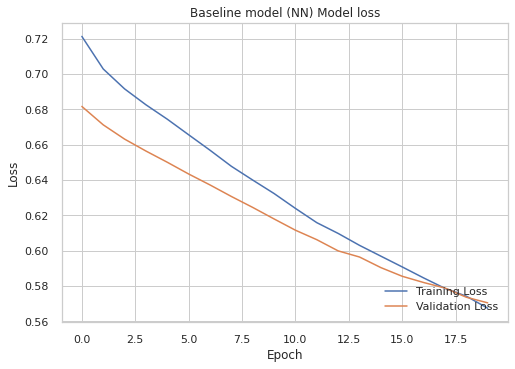

In [84]:
#### Plot training & validation accuracy values
figsize = (25, 12)
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Baseline model (NN) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

#### Plot training & validation loss values
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Baseline model (NN) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

##### The training and validation loss where decreasing are the number of epochs were increasing

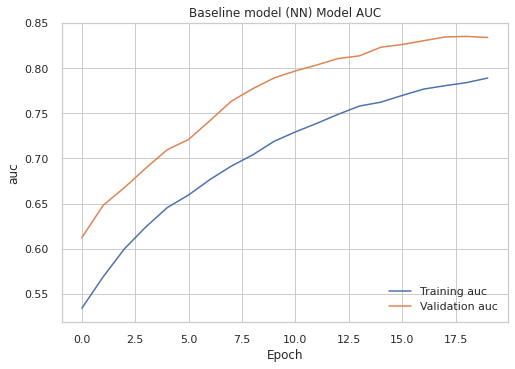

In [92]:
#### Plot training & validation loss values
plt.plot(model.history.history['auc'])
plt.plot(model.history.history['val_auc'])
plt.title('Baseline model (NN) Model AUC')
plt.ylabel('auc')
plt.xlabel('Epoch')
plt.legend(['Training auc', 'Validation auc'], loc='lower right')
plt.show()

##### The training and validation AUC scores where increasing are the number of epochs were decreasing

In [86]:
##### Load best models to make predictions #####

In [87]:
model_best =keras.models.load_model('model-baseline-DAAN-570.h5')

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost

In [88]:
model_best.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [89]:
from sklearn.metrics import *

print(confusion_matrix(y_test, model_best.predict_classes(X_test)))
print('Accuracy of our model is: ', accuracy_score(y_test, model_best.predict_classes(X_test)))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Ide

In [90]:
print('Classification report:\n\n',classification_report(y_test, model_best.predict_classes(X_test)))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

In [91]:
roc_auc_score(y_test, model_best.predict_classes(X_test))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

0.6782686567164178

In [120]:
from sklearn.metrics import f1_score

# calculate F1 score
f1_score(y_test, model_best.predict_classes(X_test),average='weighted')

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

0.7218128737675772

In [ ]:
#### Our baseline model achieved the following results in our test set:

#### f1_score  = 0.7218
#### roc_auc_score = 0 .67826

#### accuracy =   0.7343

In [ ]:
#### The training and validation loss where decreasing are the number of epochs were increasing

In [1]:
#### In terms of training time I was able to set up a GPU training strategy,
#### so because of this and the data size and data types the model ran extremely fast ######

In [ ]:
##### It does not look our model overfit our the data, the only issue is that it perform better for the 
####  class with the larger number of examples.
#### The negative outcome class 

## Part 2: Find the Best Model

In [ ]:
#### Using optuna for HPO: hyper-parameter optimizations

In [95]:
!pip install optuna 

In [78]:
import optuna
from optuna.integration import TFKerasPruningCallback

In [79]:
#This runtime value is used by Optuna to run the permutations required for hyper-parameter optimizations. 
#The results in this report were achieved over 1 hour run of the Optuna code.
runtime = 7200

In [80]:
study_name = "daan570HPO"
checkpoint_path = './daan570HPOSEPnn.hdf5'
checkpoint_dir = os.path.dirname(checkpoint_path)

In [86]:
# create checkpoint callback
cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path,
                                              monitor='val_accuracy',
                                              mode='max',
                                              save_weights_only=False,
                                              save_best_only=True,
                                              verbose=0
                                             )

In [87]:
with tf.device("gpu:1"):
    print("tf.keras code in this scope will run on GPU")
    def objective(trial):
        k.clear_session()  # Clear clutter from previous Keras session graphs.
        num_epochs = 100
            # Create callbacks for early stopping and pruning
        callbacks = [
            keras.callbacks.EarlyStopping(patience=5),
            TFKerasPruningCallback(trial, "val_accuracy"),
            cp_callback
        ]    
        model = Sequential()
        for i in range(3):                        
            model.add(Dense(int(trial.suggest_discrete_uniform(
                'FC_{}_num_hidden_units'.format(i), 16, 80, 4)),
                            activation = "relu",
                            input_dim=8
                           )
                     )              
        model.add(Dense(1, activation = 'sigmoid'))
        lr = trial.suggest_uniform("lr", 1e-5, 1e-1)
        model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr=lr), metrics=['accuracy'])
        batch_size = trial.suggest_int('Batch_size', 32, 128, 16) 
        history = model.fit(X_train, 
                           y_train,
                           validation_data= (X_test, y_test),
                           epochs=num_epochs,
                           batch_size = batch_size,
                           callbacks=callbacks,
                           verbose=0
                           )
        score = model.evaluate(X_test, y_test, verbose=0)
        return score[1]
 

tf.keras code in this scope will run on GPU


In [ ]:
tic = time.process_time()
#The below line is important to see the logs while Optuna optimization
optuna.logging.disable_default_handler()
study = optuna.create_study(
        sampler=optuna.samplers.TPESampler(
            consider_prior=True, prior_weight=1.0, 
            consider_magic_clip=True, consider_endpoints=False, 
            n_startup_trials=20, n_ei_candidates=30, 
            seed=None), 
        pruner=optuna.pruners.SuccessiveHalvingPruner(
            min_resource=2, reduction_factor=4, min_early_stopping_rate=1),
        study_name = study_name, 
        direction="maximize",
)

study.optimize(objective, timeout=runtime)

toc = time.process_time()
print("time taken :  ")
print(toc-tic)
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial number:", study.best_trial.number)
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))